In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Specify the file path in Google Drive
file_path = '/content/drive/MyDrive/Diss/roberta xlnet/combined_results.csv'

# Read the CSV file into a Data
df = pd.read_csv(file_path)


In [ ]:
#reference and modified - https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install nltk

In [3]:
# import relevant packages
import os
from collections import Counter

import tensorflow as tf
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, LSTM, GRU
from keras.models import Sequential
from keras.utils import to_categorical, pad_sequences
from keras.layers import Embedding

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import nltk
import re

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [4]:
pd.set_option('display.max_colwidth', None)
tf.keras.backend.set_image_data_format("channels_last")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Loading English stop words
stop = nltk.corpus.stopwords.words('english')

In [6]:
def pre_process_text_data(text: str) -> str:
    # normalize and remove special characters
    text = text.lower()
    text = re.sub('[^0-9a-zA-Z]+',' ',text)
    # remove stop words
    words = text.split()
    words = [w for w in words if (w not in stop)]
    words = ' '.join(words)
    return words

In [7]:
df['Summary'] = df['Summary'].apply(pre_process_text_data)
df.head()

,Publication Date,Source,URL,Title,Summary,Categories,Industries,Organisations,People,Locations,Other Entities,News topic,Title_Emotion,Title_Emotion_Score,Summary_Emotion,Summary_Emotion_Score
0,2023-10-07T03:11:36+0000,Yahoo,https://news.yahoo.com/gov-renews-public-health-order-030100117.html,"Gov. renews public health order, tacks on gun buy-backs, substance abuse treatment",oct 6 gov michelle lujan grisham friday renewed public health order aimed combating gun violence added new provisions state organize gun buy backs albuquerque espa ola las cruces provide treatment seeking help battling addictions order also includes several initial measures including testing wastewater schools drugs like fentanyl monthly inspections licensed gun dealers violations allowing police book juveniles jail without social services permission sending new mexico state police officers help local authorities fight crime albuquerque bernalillo county deputies officers arrested hundreds people following order unclear effect gun violence initiatives testing school wastewater stand friday new items added order including gun buy backs state health care system would ensure request help substance abuse receive permanent adequate treatment placement within 24 hours request renewal comes month governor declared gun violence public health emergency following high profile shooting death 11 year old boy initially enforced short lived ban publicly carrying firearms bernalillo county lujan grisham amended portion order ban carrying guns public parks playgrounds across bernalillo county something city albuquerque already sought challenged court,Non-Standard Content\nExtreme Graphic/Explicit Violence\nHealth & Fitness\nSubstance Abuse\npolitics\ninterior policy\npersonal weapon control\nHealth and Wellness\nHealth Sciences\nPublic Health\nLife and Society\nSocial Issues\nViolence\nMedical Disorders and Diseases\nSubstance Abuse\nAddiction and Drug Abuse,NaN,"Albuquerque, New Mexico",NaN,"Albuquerque, New Mexico",Michelle Lujan Grisham,Albuquerque gun ban,neutral,0.728747,neutral,0.410288
1,2023-10-07T03:42:10+0000,Yahoo,https://news.yahoo.com/governor-extends-gun-violence-order-033400080.html,Governor extends gun violence order and adds provisions,oct 6 days federal judge extended temporary block gov michelle lujan grisham revised public health order prohibiting firearms parks playgrounds public places children go albuquerque governor announced renewing order lujan grisham first announced gun ban restricting right carry open concealed firearms public places albuquerque surrounding area 30 days part public health order early september others said governor right include gun violence public health challenge worthy executive order patrick allen secretary state department health said news release issued governor office gun violence leading cause death among young people new mexico added letting continuing make investments drive violence communities protect children u district judge david herrera urias issued initial restraining order last month response several lawsuits challenging governor 30 day gun ban lujan grisham revised initial order week issued limiting gun ban areas draw children families,"Law, Gov’t & Politics\nLegal Issues\nNon-Standard Content\nExtreme Graphic/Explicit Violence\npolitics\ninterior policy\npersonal weapon control\nPolitics and Government\nGovernment Agencies (U.S.)\nDepartment of State\nLife and Society\nSocial Issues\nViolence",NaN,"Albuquerque, New Mexico\nstate",NaN,"Albuquerque, New Mexico",Michelle Lujan Grisham,Albuquerque gun ban,neutral,0.774570,fear,0.782031
2,2023-09-12T13:05:13+0000,Daily Caller,https://dailycaller.com/2023/09/12/poppy-harlow-michelle-lujan-grisham-gun-ban-criminals/,‘You Said No’: CNN Host Confronts Grisham For Enforcing Gun Ban While Admitting Criminals Will Ignore It,cnn poppy harlow confronted democratic new mexico gov michelle lujan grisham tuesday imposing emergency gun ban even though admitted criminals lik

In [8]:
from sklearn.preprocessing import LabelEncoder

# Example emotion labels
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the emotion labels
encoded_labels = label_encoder.fit_transform(emotion_labels)

# Print the mapping between original labels and encoded labels
label_mapping = dict(zip(emotion_labels, encoded_labels))
print(label_mapping)


{'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}


In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'Summary_Emotion' is the column with string labels
label_encoder = LabelEncoder()

# Fit and transform the 'Summary_Emotion' column and replace it
df['encoded_emotion'] = label_encoder.fit_transform(df['Summary_Emotion'])


In [10]:
df.head()

,Publication Date,Source,URL,Title,Summary,Categories,Industries,Organisations,People,Locations,Other Entities,News topic,Title_Emotion,Title_Emotion_Score,Summary_Emotion,Summary_Emotion_Score,encoded_emotion
0,2023-10-07T03:11:36+0000,Yahoo,https://news.yahoo.com/gov-renews-public-health-order-030100117.html,"Gov. renews public health order, tacks on gun buy-backs, substance abuse treatment",oct 6 gov michelle lujan grisham friday renewed public health order aimed combating gun violence added new provisions state organize gun buy backs albuquerque espa ola las cruces provide treatment seeking help battling addictions order also includes several initial measures including testing wastewater schools drugs like fentanyl monthly inspections licensed gun dealers violations allowing police book juveniles jail without social services permission sending new mexico state police officers help local authorities fight crime albuquerque bernalillo county deputies officers arrested hundreds people following order unclear effect gun violence initiatives testing school wastewater stand friday new items added order including gun buy backs state health care system would ensure request help substance abuse receive permanent adequate treatment placement within 24 hours request renewal comes month governor declared gun violence public health emergency following high profile shooting death 11 year old boy initially enforced short lived ban publicly carrying firearms bernalillo county lujan grisham amended portion order ban carrying guns public parks playgrounds across bernalillo county something city albuquerque already sought challenged court,Non-Standard Content\nExtreme Graphic/Explicit Violence\nHealth & Fitness\nSubstance Abuse\npolitics\ninterior policy\npersonal weapon control\nHealth and Wellness\nHealth Sciences\nPublic Health\nLife and Society\nSocial Issues\nViolence\nMedical Disorders and Diseases\nSubstance Abuse\nAddiction and Drug Abuse,NaN,"Albuquerque, New Mexico",NaN,"Albuquerque, New Mexico",Michelle Lujan Grisham,Albuquerque gun ban,neutral,0.728747,neutral,0.410288,4
1,2023-10-07T03:42:10+0000,Yahoo,https://news.yahoo.com/governor-extends-gun-violence-order-033400080.html,Governor extends gun violence order and adds provisions,oct 6 days federal judge extended temporary block gov michelle lujan grisham revised public health order prohibiting firearms parks playgrounds public places children go albuquerque governor announced renewing order lujan grisham first announced gun ban restricting right carry open concealed firearms public places albuquerque surrounding area 30 days part public health order early september others said governor right include gun violence public health challenge worthy executive order patrick allen secretary state department health said news release issued governor office gun violence leading cause death among young people new mexico added letting continuing make investments drive violence communities protect children u district judge david herrera urias issued initial restraining order last month response several lawsuits challenging governor 30 day gun ban lujan grisham revised initial order week issued limiting gun ban areas draw children families,"Law, Gov’t & Politics\nLegal Issues\nNon-Standard Content\nExtreme Graphic/Explicit Violence\npolitics\ninterior policy\npersonal weapon control\nPolitics and Government\nGovernment Agencies (U.S.)\nDepartment of State\nLife and Society\nSocial Issues\nViolence",NaN,"Albuquerque, New Mexico\nstate",NaN,"Albuquerque, New Mexico",Michelle Lujan Grisham,Albuquerque gun ban,neutral,0.774570,fear,0.782031,2
2,2023-09-12T13:05:13+0000,Daily Caller,https://dailycaller.com/2023/09/12/poppy-harlow-michelle-lujan-grisham-gun-ban-criminals/,‘You Said No’: CNN Host Confronts Grisham For Enforcing Gun Ban While Admitting Criminals Will Ignore It,cnn poppy harlow confronted democratic new mexico gov michelle lujan grisham tuesday imposing emergency gun ban even though ad

In [11]:
counts = Counter()
for i, review in enumerate(df['Summary']):
    counts.update(review.split())

In [12]:
words = sorted(counts, key=counts.get, reverse=True)
words[0:10]

['said',
 'trump',
 'de',
 'new',
 'president',
 'news',
 '2023',
 'former',
 'police',
 'year']

In [13]:
word_to_int = {word: i for i, word in enumerate(words, start=1)}
int_to_word = {i: word for i, word in enumerate(words, start=1)}

In [14]:
def text_to_int(text:str, word_to_int: dict):
    return [word_to_int[word] for word in review.split()]


def int_to_text(int_arr, int_to_word: dict):
    return ' '.join([int_to_word[index] for index in int_arr if index != 0])

In [15]:
mapped_news = []
for news in df['Summary']:
    mapped_news.append(text_to_int(news, word_to_int))

In [16]:
print(f'Original news: {df.loc[0]["Summary"]}')
print(f'Mapped news: {mapped_news[0]}')

Original news: oct 6 gov michelle lujan grisham friday renewed public health order aimed combating gun violence added new provisions state organize gun buy backs albuquerque espa ola las cruces provide treatment seeking help battling addictions order also includes several initial measures including testing wastewater schools drugs like fentanyl monthly inspections licensed gun dealers violations allowing police book juveniles jail without social services permission sending new mexico state police officers help local authorities fight crime albuquerque bernalillo county deputies officers arrested hundreds people following order unclear effect gun violence initiatives testing school wastewater stand friday new items added order including gun buy backs state health care system would ensure request help substance abuse receive permanent adequate treatment placement within 24 hours request renewal comes month governor declared gun violence public health emergency following high profile shoo

In [17]:
length_sent = []
for i in range(len(mapped_news)):
    length_sent.append(len(mapped_news[i]))

In [18]:
sequence_length = max(length_sent)
X = pad_sequences(maxlen = sequence_length,
                  sequences = mapped_news,
                  padding = "post",
                  value = 0)

In [19]:
X[0]

array([16379,   517, 13754,   669, 30206, 22967,  4103,    24,  3829,
           9, 11372, 37440,   121,  1092,  1990,   553,  1010,  8757,
          18, 34663,    91,    16,  1751,   402,  5836,   909,  4956,
        9221,   653,  3402,  1446,  3684,    91,  1201, 11372,   975,
           1,  3050,  1591, 30311, 23002, 13370,   706, 37439, 30311,
       37440, 11372,  9620, 46022,     6,   591,    88,  3684,     1,
       40139,  5553,   853, 13055, 52589,  5803, 13520, 46030, 10589,
         520, 23002, 46068,  5875,   669,  3050,  1009,     9,   690,
         721,    91,   205,   531,  9047,   684,  1781,   447,   207,
        1781,   517,   669,  1009], dtype=int32)

In [20]:
y = df['encoded_emotion'].values

In [21]:
from keras.preprocessing.text import Tokenizer
import pandas as pd

# Assuming 'df' is your DataFrame with a 'summary' column
# Extract the 'summary' column
summaries = df['Summary'].astype(str)

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(summaries)

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the reserved 0 index

print("Vocabulary Size:", vocab_size)


Vocabulary Size: 139583


In [22]:
embedding_vector_length = 100
max_news_length = 85  # Update to your intended maximum sequence length

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=max_news_length))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 85, 100)           13958300  
                                                                 
 lstm (LSTM)                 (None, 85, 40)            22560     
                                                                 
 lstm_1 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 7)                 287       
                                                                 
Total params: 13994107 (53.38 MB)
Trainable params: 13994107 (53.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' is your DataFrame with 'Summary', 'News_Topic', and 'Sentiment' columns
# Extract the 'summary', 'news_topic', and 'sentiment' columns
summaries = df['Summary'].astype(str)
news_topics = df['News topic']
sentiments = df['Summary_Emotion']

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(summaries)

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the reserved 0 index

# Tokenize the text for all summaries
sequences = tokenizer.texts_to_sequences(summaries)
padded_sequences = pad_sequences(sequences, maxlen=max_news_length)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(sentiments)
encoded_labels = to_categorical(encoded_labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, encoded_labels, test_size=0.2, random_state=42
)

# Build and compile the LSTM model for all topics
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=max_news_length))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=16, batch_size=32)

# Save directory
save_directory = '/content/drive/MyDrive/Diss/many to one lstm/combined h5/'

# Save or store the trained model for all topics
model.save(f"{save_directory}lstm_model_all_topics.h5")


Epoch 1/16
1532/1532 [==============================] - 627s 406ms/step - loss: 1.3626 - accuracy: 0.4783 - val_loss: 1.2336 - val_accuracy: 0.5490
Epoch 2/16
1532/1532 [==============================] - 618s 403ms/step - loss: 0.9873 - accuracy: 0.6538 - val_loss: 1.1982 - val_accuracy: 0.5742
Epoch 3/16
1532/1532 [==============================] - 614s 401ms/step - loss: 0.6827 - accuracy: 0.7669 - val_loss: 1.3303 - val_accuracy: 0.5678
Epoch 4/16
1532/1532 [==============================] - 615s 401ms/step - loss: 0.4668 - accuracy: 0.8448 - val_loss: 1.4419 - val_accuracy: 0.5747
Epoch 5/16
1532/1532 [==============================] - 615s 401ms/step - loss: 0.3266 - accuracy: 0.8940 - val_loss: 1.5625 - val_accuracy: 0.5728
Epoch 6/16
1532/1532 [==============================] - 617s 403ms/step - loss: 0.2328 - accuracy: 0.9247 - val_loss: 1.7923 - val_accuracy: 0.5731
Epoch 7/16
1532/1532 [==============================] - 625s 408ms/step - loss: 0.1695 - accuracy: 0.9456 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from tensorflow.keras.models import load_model

# Replace 'your/full/path/to/your_model_file.h5' with the actual full path of your saved model
model_path = '/content/drive/MyDrive/Diss/many to one lstm/combined h5/lstm_model_all_topics.h5'
model = load_model(model_path)

# Now, you can use the 'model' object to make predictions or further training


In [ ]:
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

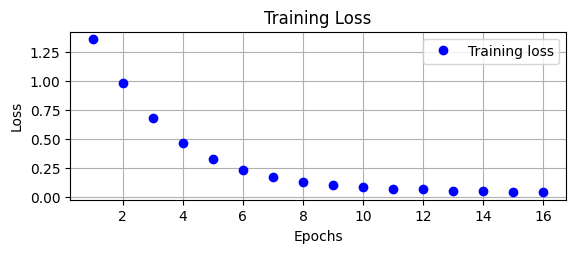

In [ ]:
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

<ipython-input-114-e5d6e124a9ec>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])


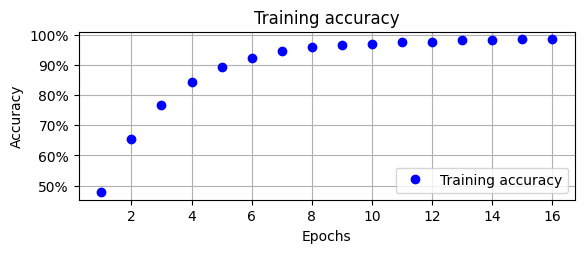

In [ ]:
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

In [ ]:
def get_sentiment(model, text) -> str:
    text_int_embedding = text_to_int(text, word_to_int)
    text_int_embedding = pad_sequences(maxlen = sequence_length,
                                       sequences = [text_int_embedding],
                                       padding = "post", value = 0)
    sentiment_index = np.argmax(model.predict(text_int_embedding))
    return sentiment_index

In [ ]:
result = np.argmax(model.predict(X_test), axis=1)

383/383 [==============================] - 10s 25ms/step


In [27]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report

In [29]:
predictions_val = model.predict(X_test)
class_predictions_val = predictions_val.argmax(axis=1)

# Decode one-hot encoded labels to integers
true_labels_val = np.argmax(y_test, axis=1)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(true_labels_val, class_predictions_val)
print(f"Accuracy on the validation set: {accuracy_val}")

# Print classification report for the validation set
print("Classification Report on the validation set:")
print(classification_report(true_labels_val, class_predictions_val))

383/383 [==============================] - 2s 4ms/step
Accuracy on the validation set: 0.2461438015179956
Classification Report on the validation set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2574
           1       0.00      0.00      0.00       660
           2       0.25      1.00      0.40      3016
           3       0.00      0.00      0.00       669
           4       0.00      0.00      0.00      4043
           5       0.00      0.00      0.00      1127
           6       0.00      0.00      0.00       164

    accuracy                           0.25     12253
   macro avg       0.04      0.14      0.06     12253
weighted avg       0.06      0.25      0.10     12253



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels_val, class_predictions_val)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[   0    0 2574    0    0    0    0]
 [   0    0  660    0    0    0    0]
 [   0    0 3016    0    0    0    0]
 [   0    0  669    0    0    0    0]
 [   0    0 4043    0    0    0    0]
 [   0    0 1127    0    0    0    0]
 [   0    0  164    0    0    0    0]]
